In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
df=pd.read_csv('TFG_OFICIAL-Copy1.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17919 entries, 0 to 17918
Data columns (total 45 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Case_number                     17919 non-null  object 
 1   District_code                   17919 non-null  int64  
 2   District_name                   17919 non-null  object 
 3   Neighborhood_code               17919 non-null  int64  
 4   Neighborhood_name               17919 non-null  object 
 5   Street_code                     17919 non-null  int64  
 6   Street_name                     17919 non-null  object 
 7   Postal_number                   17919 non-null  object 
 8   Week_day                        17919 non-null  object 
 9   Year                            17919 non-null  int64  
 10  Month                           17919 non-null  int64  
 11  Month_name                      17919 non-null  object 
 12  Day_month                       

In [6]:
df.drop('District_code', axis=1, inplace=True)
df.drop('Neighborhood_code', axis=1, inplace=True)
df.drop('Street_code', axis=1, inplace=True)
df.drop('Neighborhood_name', axis=1, inplace=True)
df.drop('Street_name', axis=1, inplace=True)
df.drop('Postal_number', axis=1, inplace=True)
df.drop('Month_name', axis=1, inplace=True)
df.drop('Shift', axis=1, inplace=True)
df.drop('Pedestrian_cause', axis=1, inplace=True)
df.drop('Pedestrian_collision_place', axis=1, inplace=True)
df.drop('Pedestrian_displacement_motive', axis=1, inplace=True)
df.drop('Driver_displacement_motive', axis=1, inplace=True)
df.drop('Latitude', axis=1, inplace=True)
df.drop('Longitude', axis=1, inplace=True)
df.drop('Coordinate_UTM_X_ED50 ', axis=1, inplace=True)
df.drop('Coordinate_UTM_Y_ED50', axis=1, inplace=True)

In [7]:
df.drop('Time_segment', axis=1, inplace=True)

In [9]:
import pandas as pd

# Supongamos que tu DataFrame se llama 'df' y la columna con las horas es 'Time'
# Crear una función que asigna el segmento de tiempo según las condiciones dadas
def assign_time_segment(time):
    if 6 <= time < 8:
        return '6-8'
    elif 8 <= time < 10:
        return '8-10'
    elif 10 <= time < 12:
        return '10-12'
    elif 12 <= time < 14:
        return '12-14'
    elif 14 <= time < 16:
        return '14-16'
    elif 16 <= time < 18:
        return '16-18'
    elif 18 <= time < 20:
        return '18-20'
    elif 20 <= time < 22:
        return '20-22'
    elif 22 <= time <= 23:
        return '22-0'
    elif 0 <= time < 2:
        return '0-2'
    elif 2 <= time < 4:
        return '2-4'
    else:
        return '4-6'

# Aplicar la función a la columna 'Time' para crear la nueva columna 'Time_segment'
df['Time_segment'] = df['Time'].apply(assign_time_segment)


In [10]:
df

,Case_number,District_name,Week_day,Year,Month,Day_month,Time,Type_of_vehicle,Sex,Age,...,Weekend Exists,Season,Density,TM,HRM,PM,PPT,RS24h,VVM10,Time_segment
0,2021S000001,Les Corts,Friday,2021,1,1,0,Motorcycle,Man,24,...,True,Winter,1,8.9,61,1001.0,0.1,1.5,1.9,0-2
1,2021S000001,Les Corts,Friday,2021,1,1,0,Tourism,Man,24,...,True,Winter,1,8.9,61,1001.0,0.1,1.5,1.9,0-2
2,2021S000002,Eixample,Friday,2021,1,1,12,Tourism,Woman,49,...,True,Winter,1,8.9,61,1001.0,0.1,1.5,1.9,12-14
3,2021S000002,Eixample,Friday,2021,1,1,12,Ciclomotor,Man,50,...,True,Winter,1,8.9,61,1001.0,0.1,1.5,1.9,12-14
4,2021S000002,Eixample,Friday,2021,1,1,12,Tourism,Man,21,...,True,Winter,1,8.9,61,1001.0,0.1,1.5,1.9,12-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17914,2022S008011,Nou Barris,Saturday,2022,12,31,18,Tourism,Woman,43,...,False,Winter,1,17.2,57,1020.7,0.0,8.7,1.9,18-20
17915,2022S008007,Nou Barris,Saturday,2022,12,31,21,Taxi,Woman,22,...,False,Winter,1,17.2,57,1020.7,0.0,8.7,1.9,20-22
17916,2022S008007,Nou Barris,Saturday,2022,12,31,21,Taxi,Woman,24,...,False,Winter,1,17.2,57,1020.7,0.0,8.7,1.9,20-22
17917,2022S008009,Sarrià-Sant Gervasi,Saturday,2022,12,31,21,Tourism,Woman,27,...,False,Winter,1,17.2,57,1020.7,0.0,8.7,1.9,20-22


In [11]:
df = df[df['Injury_severity'] != 'Natural Death']

In [12]:

mapping = {'Slight': 0, 'Slight Assistance': 1, 'Hospitalized': 2, 'Severe': 3, 'Dead': 4}
df['Injury_severity'] = df['Injury_severity'].map(mapping)

C:\Users\julsd\anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [13]:
import pandas as pd


# Identificar los índices de las filas con los valores máximos en 'Injury_severity' dentro de cada grupo de 'Case_number'
max_injury_indices = df.groupby('Case_number')['Injury_severity'].idxmax()

# Seleccionar las filas deseadas usando los índices identificados
df_selected = df.loc[max_injury_indices]


In [14]:
df=df_selected

In [15]:
df

,Case_number,District_name,Week_day,Year,Month,Day_month,Time,Type_of_vehicle,Sex,Age,...,Weekend Exists,Season,Density,TM,HRM,PM,PPT,RS24h,VVM10,Time_segment
0,2021S000001,Les Corts,Friday,2021,1,1,0,Motorcycle,Man,24,...,True,Winter,1,8.9,61,1001.0,0.1,1.5,1.9,0-2
2,2021S000002,Eixample,Friday,2021,1,1,12,Tourism,Woman,49,...,True,Winter,1,8.9,61,1001.0,0.1,1.5,1.9,12-14
7,2021S000003,Sant Andreu,Friday,2021,1,1,18,Tourism,Woman,46,...,True,Winter,1,8.9,61,1001.0,0.1,1.5,1.9,18-20
10,2021S000004,Eixample,Friday,2021,1,1,20,Tourism,Woman,58,...,True,Winter,1,8.9,61,1001.0,0.1,1.5,1.9,20-22
6,2021S000005,Gràcia,Friday,2021,1,1,12,Motorcycle,Man,27,...,True,Winter,1,8.9,61,1001.0,0.1,1.5,1.9,12-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17914,2022S008011,Nou Barris,Saturday,2022,12,31,18,Tourism,Woman,43,...,False,Winter,1,17.2,57,1020.7,0.0,8.7,1.9,18-20
17308,2022S008012,Gràcia,Tuesday,2022,12,6,10,Motorcycle,Woman,48,...,False,Winter,1,12.8,74,1011.7,0.0,7.0,0.9,10-12
17378,2022S008013,Eixample,Saturday,2022,12,10,1,Motorcycle,Man,27,...,False,Winter,1,12.4,56,1001.0,0.3,7.4,2.6,0-2
17912,2023S000004,Gràcia,Saturday,2022,12,31,15,Bicycle,Man,48,...,False,Winter,1,17.2,57,1020.7,0.0,8.7,1.9,14-16


In [16]:
df.to_csv('TFG_classificat_12.csv',index=False)

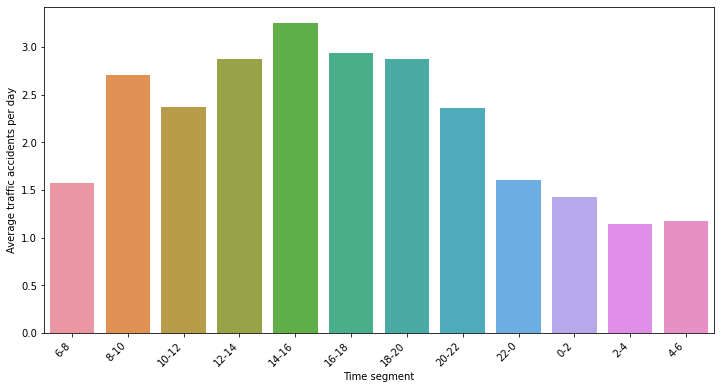

In [18]:
grouped_df = df.groupby(['Time_segment', 'Day']).size().reset_index(name='Accident_Count')
mean_accidents = grouped_df.groupby('Time_segment')['Accident_Count'].mean().reset_index(name='Mean_Accidents')

desired_order = ['6-8', '8-10', '10-12', '12-14', '14-16', '16-18', '18-20', '20-22', '22-0', '0-2', '2-4', '4-6']


plt.figure(figsize=(12, 6))
sns.barplot(x='Time_segment', y='Mean_Accidents', data=mean_accidents, order=desired_order)

# Configuración adicional
#plt.title('Media de Accidentes de Tráfico por Franja Horaria al Día')
plt.xlabel('Time segment')
plt.ylabel('Average traffic accidents per day')
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.show()

In [20]:
import pandas as pd

# Suponiendo que tu DataFrame se llama 'df'
# Crear la columna 'Number of victims by time segment'
df['Number of victims by time segment'] = df.groupby(['Day', 'Time_segment'])['Numero_expedient_count'].transform('sum')

# Verificar los cambios
print(df[['Day', 'Time_segment', 'Numero_expedient_count', 'Number of victims by time segment']].head())

           Day Time_segment  Numero_expedient_count  \
0   01/01/2021          0-2                       2   
2   01/01/2021        12-14                       4   
7   01/01/2021        18-20                       3   
10  01/01/2021        20-22                       4   
6   01/01/2021        12-14                       1   

    Number of victims by time segment  
0                                   2  
2                                   5  
7                                   3  
10                                  4  
6                                   5  


In [21]:
df

,Case_number,District_name,Week_day,Year,Month,Day_month,Time,Type_of_vehicle,Sex,Age,...,Season,Density,TM,HRM,PM,PPT,RS24h,VVM10,Time_segment,Number of victims by time segment
0,2021S000001,Les Corts,Friday,2021,1,1,0,Motorcycle,Man,24,...,Winter,1,8.9,61,1001.0,0.1,1.5,1.9,0-2,2
2,2021S000002,Eixample,Friday,2021,1,1,12,Tourism,Woman,49,...,Winter,1,8.9,61,1001.0,0.1,1.5,1.9,12-14,5
7,2021S000003,Sant Andreu,Friday,2021,1,1,18,Tourism,Woman,46,...,Winter,1,8.9,61,1001.0,0.1,1.5,1.9,18-20,3
10,2021S000004,Eixample,Friday,2021,1,1,20,Tourism,Woman,58,...,Winter,1,8.9,61,1001.0,0.1,1.5,1.9,20-22,4
6,2021S000005,Gràcia,Friday,2021,1,1,12,Motorcycle,Man,27,...,Winter,1,8.9,61,1001.0,0.1,1.5,1.9,12-14,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17914,2022S008011,Nou Barris,Saturday,2022,12,31,18,Tourism,Woman,43,...,Winter,1,17.2,57,1020.7,0.0,8.7,1.9,18-20,1
17308,2022S008012,Gràcia,Tuesday,2022,12,6,10,Motorcycle,Woman,48,...,Winter,1,12.8,74,1011.7,0.0,7.0,0.9,10-12,2
17378,2022S008013,Eixample,Saturday,2022,12,10,1,Motorcycle,Man,27,...,Winter,1,12.4,56,1001.0,0.3,7.4,2.6,0-2,7
17912,2023S000004,Gràcia,Saturday,2022,12,31,15,Bicycle,Man,48,...,Winter,1,17.2,57,1020.7,0.0,8.7,1.9,14-16,3


In [22]:
df['Exceeds_Threshold'] = df['Number of victims by time segment'] >= 2


df['Exceeds_Threshold'] = df['Exceeds_Threshold'].astype(bool)

In [23]:
df

,Case_number,District_name,Week_day,Year,Month,Day_month,Time,Type_of_vehicle,Sex,Age,...,Density,TM,HRM,PM,PPT,RS24h,VVM10,Time_segment,Number of victims by time segment,Exceeds_Threshold
0,2021S000001,Les Corts,Friday,2021,1,1,0,Motorcycle,Man,24,...,1,8.9,61,1001.0,0.1,1.5,1.9,0-2,2,True
2,2021S000002,Eixample,Friday,2021,1,1,12,Tourism,Woman,49,...,1,8.9,61,1001.0,0.1,1.5,1.9,12-14,5,True
7,2021S000003,Sant Andreu,Friday,2021,1,1,18,Tourism,Woman,46,...,1,8.9,61,1001.0,0.1,1.5,1.9,18-20,3,True
10,2021S000004,Eixample,Friday,2021,1,1,20,Tourism,Woman,58,...,1,8.9,61,1001.0,0.1,1.5,1.9,20-22,4,True
6,2021S000005,Gràcia,Friday,2021,1,1,12,Motorcycle,Man,27,...,1,8.9,61,1001.0,0.1,1.5,1.9,12-14,5,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17914,2022S008011,Nou Barris,Saturday,2022,12,31,18,Tourism,Woman,43,...,1,17.2,57,1020.7,0.0,8.7,1.9,18-20,1,False
17308,2022S008012,Gràcia,Tuesday,2022,12,6,10,Motorcycle,Woman,48,...,1,12.8,74,1011.7,0.0,7.0,0.9,10-12,2,True
17378,2022S008013,Eixample,Saturday,2022,12,10,1,Motorcycle,Man,27,...,1,12.4,56,1001.0,0.3,7.4,2.6,0-2,7,True
17912,2023S000004,Gràcia,Saturday,2022,12,31,15,Bicycle,Man,48,...,1,17.2,57,1020.7,0.0,8.7,1.9,14-16,3,True


In [24]:
df.to_csv('TFG_classificat_2h.csv',index=False)

In [25]:
df

,Case_number,District_name,Week_day,Year,Month,Day_month,Time,Type_of_vehicle,Sex,Age,...,Density,TM,HRM,PM,PPT,RS24h,VVM10,Time_segment,Number of victims by time segment,Exceeds_Threshold
0,2021S000001,Les Corts,Friday,2021,1,1,0,Motorcycle,Man,24,...,1,8.9,61,1001.0,0.1,1.5,1.9,0-2,2,True
2,2021S000002,Eixample,Friday,2021,1,1,12,Tourism,Woman,49,...,1,8.9,61,1001.0,0.1,1.5,1.9,12-14,5,True
7,2021S000003,Sant Andreu,Friday,2021,1,1,18,Tourism,Woman,46,...,1,8.9,61,1001.0,0.1,1.5,1.9,18-20,3,True
10,2021S000004,Eixample,Friday,2021,1,1,20,Tourism,Woman,58,...,1,8.9,61,1001.0,0.1,1.5,1.9,20-22,4,True
6,2021S000005,Gràcia,Friday,2021,1,1,12,Motorcycle,Man,27,...,1,8.9,61,1001.0,0.1,1.5,1.9,12-14,5,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17914,2022S008011,Nou Barris,Saturday,2022,12,31,18,Tourism,Woman,43,...,1,17.2,57,1020.7,0.0,8.7,1.9,18-20,1,False
17308,2022S008012,Gràcia,Tuesday,2022,12,6,10,Motorcycle,Woman,48,...,1,12.8,74,1011.7,0.0,7.0,0.9,10-12,2,True
17378,2022S008013,Eixample,Saturday,2022,12,10,1,Motorcycle,Man,27,...,1,12.4,56,1001.0,0.3,7.4,2.6,0-2,7,True
17912,2023S000004,Gràcia,Saturday,2022,12,31,15,Bicycle,Man,48,...,1,17.2,57,1020.7,0.0,8.7,1.9,14-16,3,True
